# Stock Kelly Arithmetic Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = '^NSEBANK' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def kelly_fraction(stock_returns):
    # returns = np.array(stock_returns)
    wins = stock_returns[stock_returns > 0]
    losses = stock_returns[stock_returns <= 0]
    W = len(wins) / len(stock_returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ( (1 - W) / R )
    return kelly_f

def expected_arith(stock_returns):
    expected_arith = np.mean(stock_returns)
    return expected_arith

def kelly_arithmetic(stock_returns):
    bounded_rets = stock_returns / np.abs(np.min(stock_returns))
    kelly_f = kelly_fraction(bounded_rets) / np.abs(np.min(stock_returns))
    exp_arith_kelly = expected_arith(bounded_rets * kelly_f)
    return exp_arith_kelly

Text(0, 0.5, 'Kelly Arithmetic')

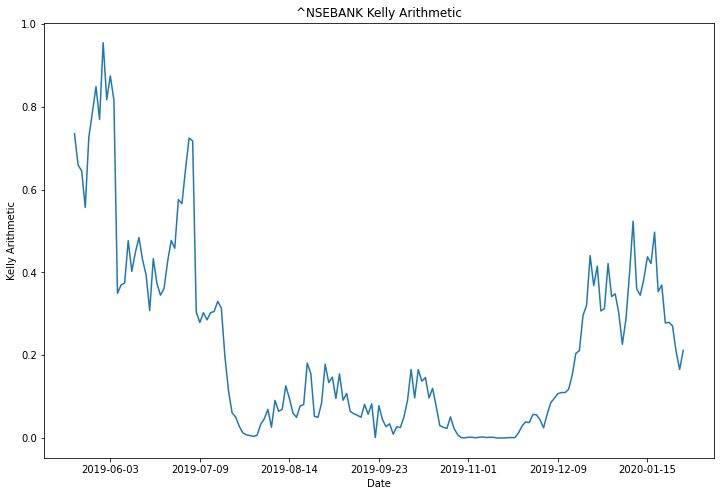

In [6]:
# Compute the running Kelly Arithmetic
running = [kelly_arithmetic(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Kelly Arithmetic up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kelly Arithmetic')
plt.xlabel('Date')
plt.ylabel('Kelly Arithmetic')

In [7]:
ka = kelly_arithmetic(stocks_returns)
ka

0.0004443334052371912

In [8]:
running

[0.7344549866269906,
 0.6590771183296686,
 0.645101341894963,
 0.5566194229350296,
 0.7265303606280866,
 0.7861968522750912,
 0.8486046364586038,
 0.7690322353162754,
 0.9545292521500027,
 0.8166487426970803,
 0.8743311811596193,
 0.815832232345261,
 0.34964237381838026,
 0.36947956974635354,
 0.37428932462773995,
 0.4764779037647231,
 0.40259355634833316,
 0.44852690007181306,
 0.48400944859638956,
 0.43065941935234225,
 0.3938612676406648,
 0.30771244543978454,
 0.43317720866139964,
 0.37357963291415014,
 0.34484699954429554,
 0.36085404454806314,
 0.4260863995437543,
 0.47705534707474545,
 0.4582211624544422,
 0.5757454634956439,
 0.5657736414595111,
 0.6484085745178205,
 0.7242891190924504,
 0.7172422124898308,
 0.3038604444670183,
 0.27898913827906563,
 0.3025950683427618,
 0.2853643001824103,
 0.3027097427007682,
 0.3055479488049973,
 0.3301142477930119,
 0.3135892330186373,
 0.19721524010238148,
 0.11449692943884512,
 0.06113640247855949,
 0.05072119637379889,
 0.028417920632256

In [9]:
print('Expected Value (Arithmetic): {}%'.format(np.round(kelly_arithmetic(stocks_returns) * 100, 5)))

Expected Value (Arithmetic): 0.04443%
